# Cluster Analysis

## Business Objective: Creating clusters on global development measurement dataset



## Variable Description:
## Birth Rate, Business tax, CO2emissions, Country, Days to start business, Ease of business, energy usage, GDP, healthexp%GDP, healthexp/capita, hours to do tax, infant mortality, internet usage, lending rate, life expectancy female, etc.


## importing the modules 

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read the data set 

In [131]:
data=pd.read_excel("World_development_mesurement (1).xlsx")

In [132]:
data

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [134]:
data.columns=data.columns.str.replace(' ','_').str.lower()

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   birth_rate              2585 non-null   float64
 1   business_tax_rate       1423 non-null   object 
 2   co2_emissions           2125 non-null   float64
 3   country                 2704 non-null   object 
 4   days_to_start_business  1718 non-null   float64
 5   ease_of_business        185 non-null    float64
 6   energy_usage            1785 non-null   float64
 7   gdp                     2494 non-null   object 
 8   health_exp_%_gdp        2395 non-null   float64
 9   health_exp/capita       2395 non-null   object 
 10  hours_to_do_tax         1416 non-null   float64
 11  infant_mortality_rate   2444 non-null   float64
 12  internet_usage          2531 non-null   float64
 13  lending_interest        1880 non-null   float64
 14  life_expectancy_female  2568 non-null   

In [136]:
def cleaning(df, clean):
    for i in clean:
        # Convert the column to string first to avoid errors
        df[i] = df[i].astype(str).str.lstrip('$')
        df[i] = df[i].str.replace(',', '', regex=False)
        df[i] = df[i].str.rstrip('%')
        df[i] = pd.to_numeric(df[i], errors='coerce')  # Convert to float, handling errors
    return df


In [137]:
clean=['business_tax_rate','gdp','health_exp/capita','tourism_inbound','tourism_outbound']

In [138]:
data.columns,

(Index(['birth_rate', 'business_tax_rate', 'co2_emissions', 'country',
        'days_to_start_business', 'ease_of_business', 'energy_usage', 'gdp',
        'health_exp_%_gdp', 'health_exp/capita', 'hours_to_do_tax',
        'infant_mortality_rate', 'internet_usage', 'lending_interest',
        'life_expectancy_female', 'life_expectancy_male', 'mobile_phone_usage',
        'number_of_records', 'population_0-14', 'population_15-64',
        'population_65+', 'population_total', 'population_urban',
        'tourism_inbound', 'tourism_outbound'],
       dtype='object'),)

In [139]:
cleaning(data,clean)

,birth_rate,business_tax_rate,co2_emissions,country,days_to_start_business,ease_of_business,energy_usage,gdp,health_exp_%_gdp,health_exp/capita,...,life_expectancy_male,mobile_phone_usage,number_of_records,population_0-14,population_15-64,population_65+,population_total,population_urban,tourism_inbound,tourism_outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,5.479006e+10,0.035,60.0,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,1.020000e+08,1.930000e+08
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,9.129595e+09,0.034,22.0,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,3.400000e+07,1.460000e+08
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,2.359122e+09,0.043,15.0,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,7.700000e+07,5.000000e+07
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,5.788312e+09,0.047,152.0,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,2.270000e+08,2.090000e+08
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,2.610959e+09,0.051,12.0,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4,NaN,United States,5.0,4.0,2132446.0,1.624460e+13,0.179,8895.0,...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,2.000920e+11,1.265730e+11
2701,0.015,41.9,NaN,Uruguay,7.0,85.0,NaN,5.000435e+10,0.089,1308.0,...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,2.222000e+09,1.028000e+09
2702,0.020,61.9,NaN,"Venezuela, RB",144.0,180.0,NaN,3.812862e+11,0.046,593.0,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,9.040000e+08,3.202000e+09


In [140]:
null_values=pd.DataFrame(data.isnull().sum(),columns=['sum_of_null'])
null_values['percentage']=(null_values['sum_of_null']/data.shape[0]) * 100
t=null_values.sort_values(by='sum_of_null',ascending=False)

In [141]:
t

,sum_of_null,percentage
ease_of_business,2519,93.158284
hours_to_do_tax,1288,47.633136
business_tax_rate,1281,47.374260
days_to_start_business,986,36.464497
energy_usage,919,33.986686
lending_interest,824,30.473373
co2_emissions,579,21.412722
tourism_outbound,471,17.418639
tourism_inbound,368,13.609467
health_exp_%_gdp,309,11.427515


In [142]:
data.isnull().sum().sum()

11740

-->almost 11740 data points are null  we cant remove all the points so we want a better aproach to impute the missing values

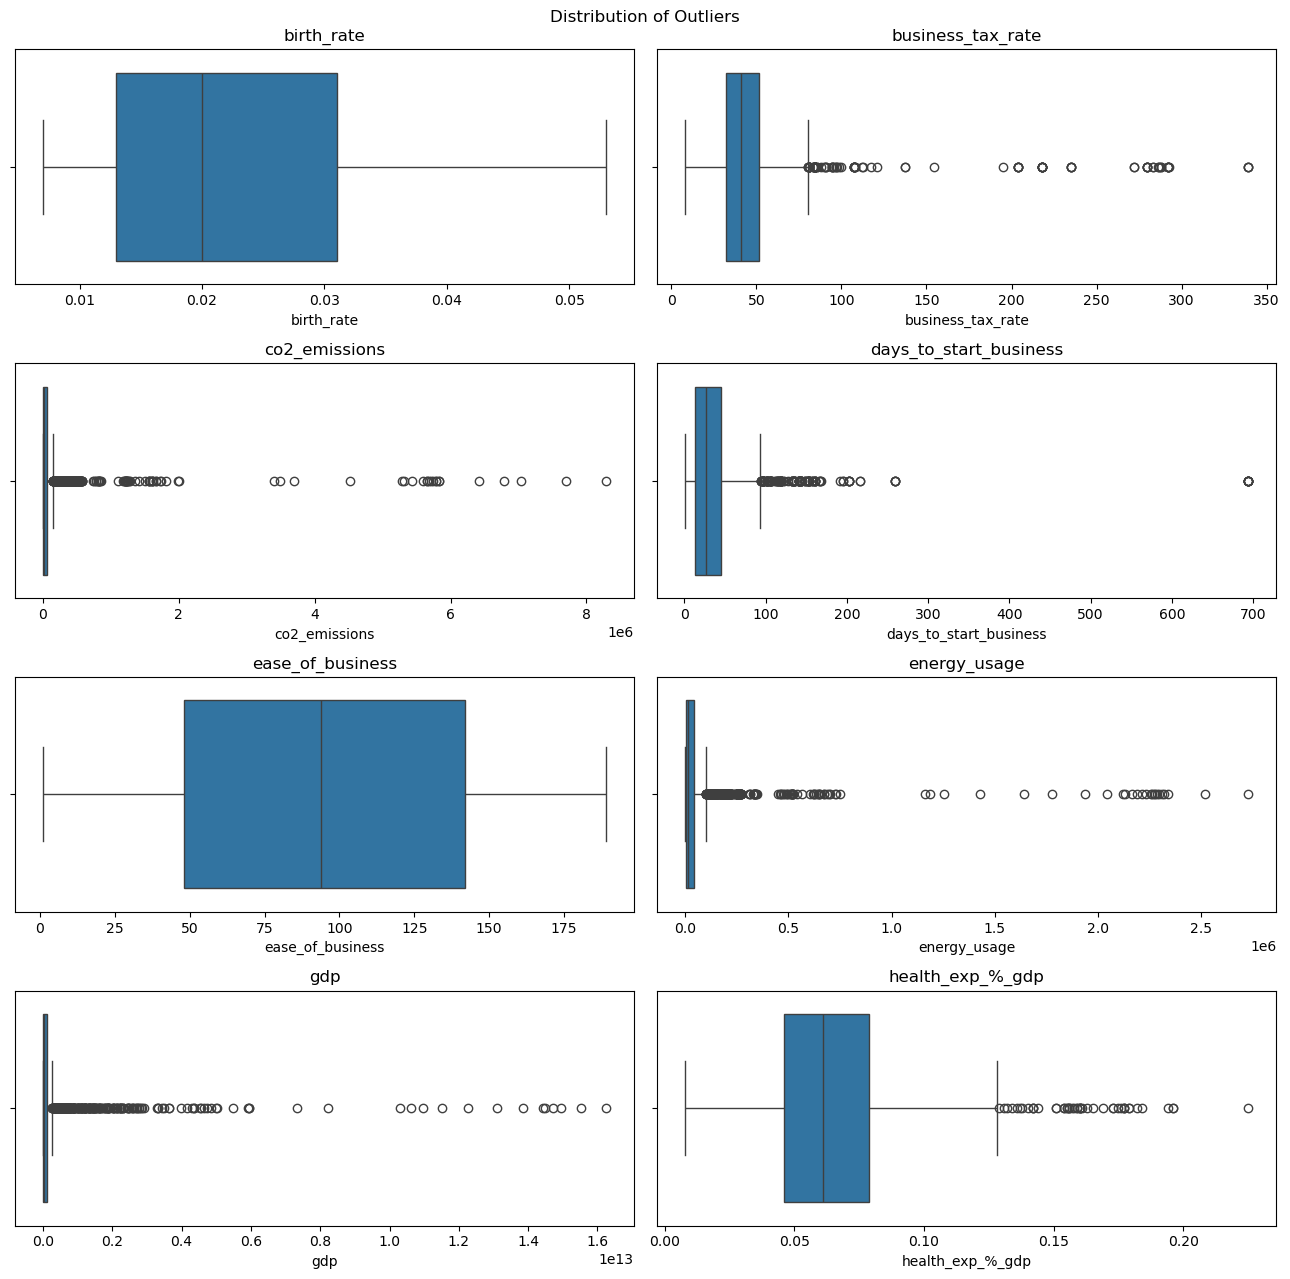

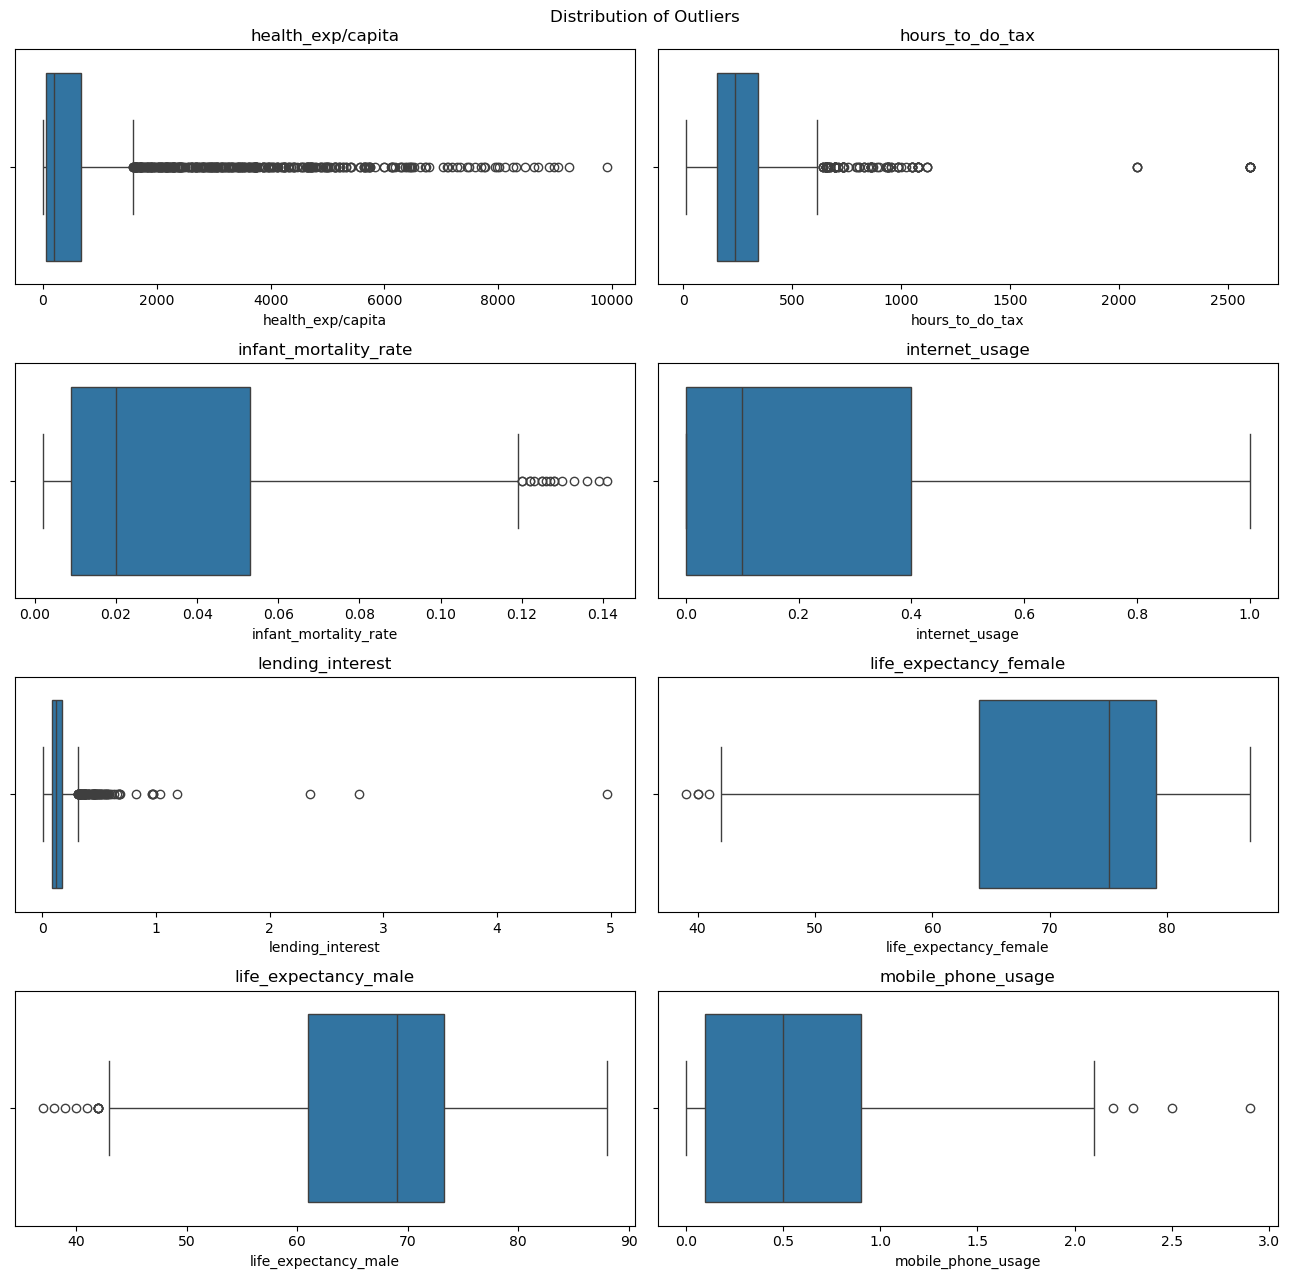

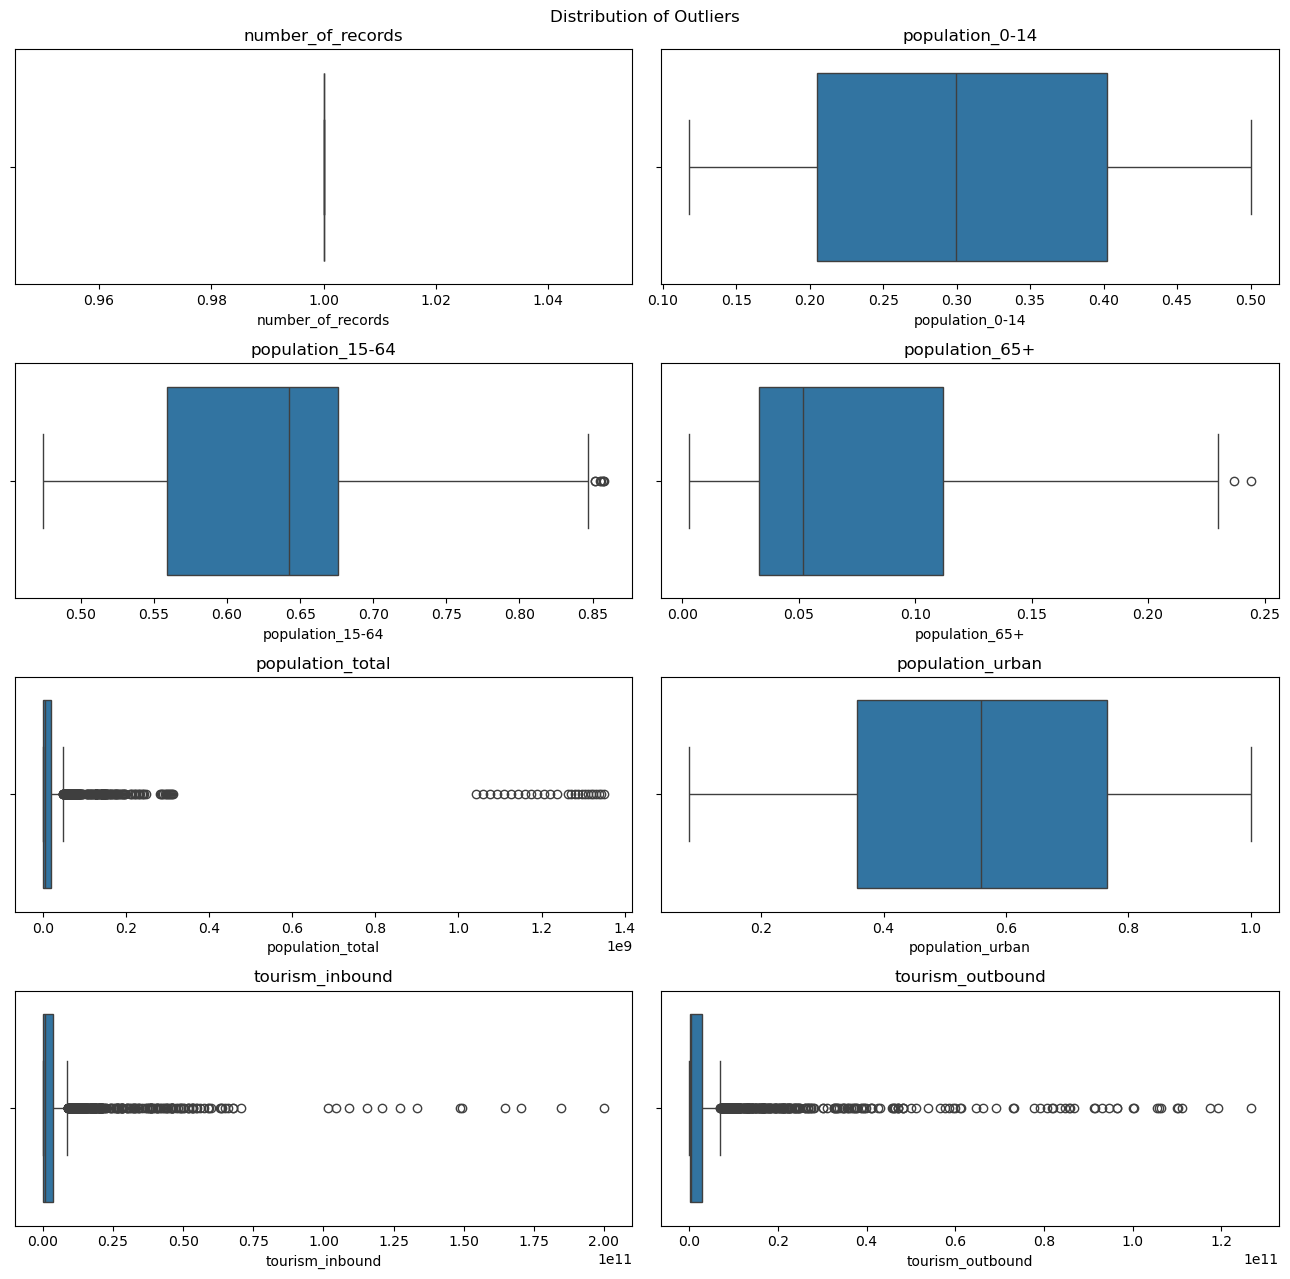

In [143]:

num_list = data.select_dtypes(exclude='object').columns
num_features = len(num_list)

# Create a loop to plot all features
for idx, i in enumerate(num_list):
    if idx % 8 == 0:
        # Create a new figure for every 8 plots
        plt.figure(figsize=(13, 13))
        plt.suptitle("Distribution of Outliers")

    plt.subplot(4, 2, (idx % 8) + 1)
    sns.boxplot(x=data[i])
    plt.title(i)
    plt.tight_layout()

plt.show()


-->we find almost every data as outerliers  so we use caping techinue to remove the outer liers

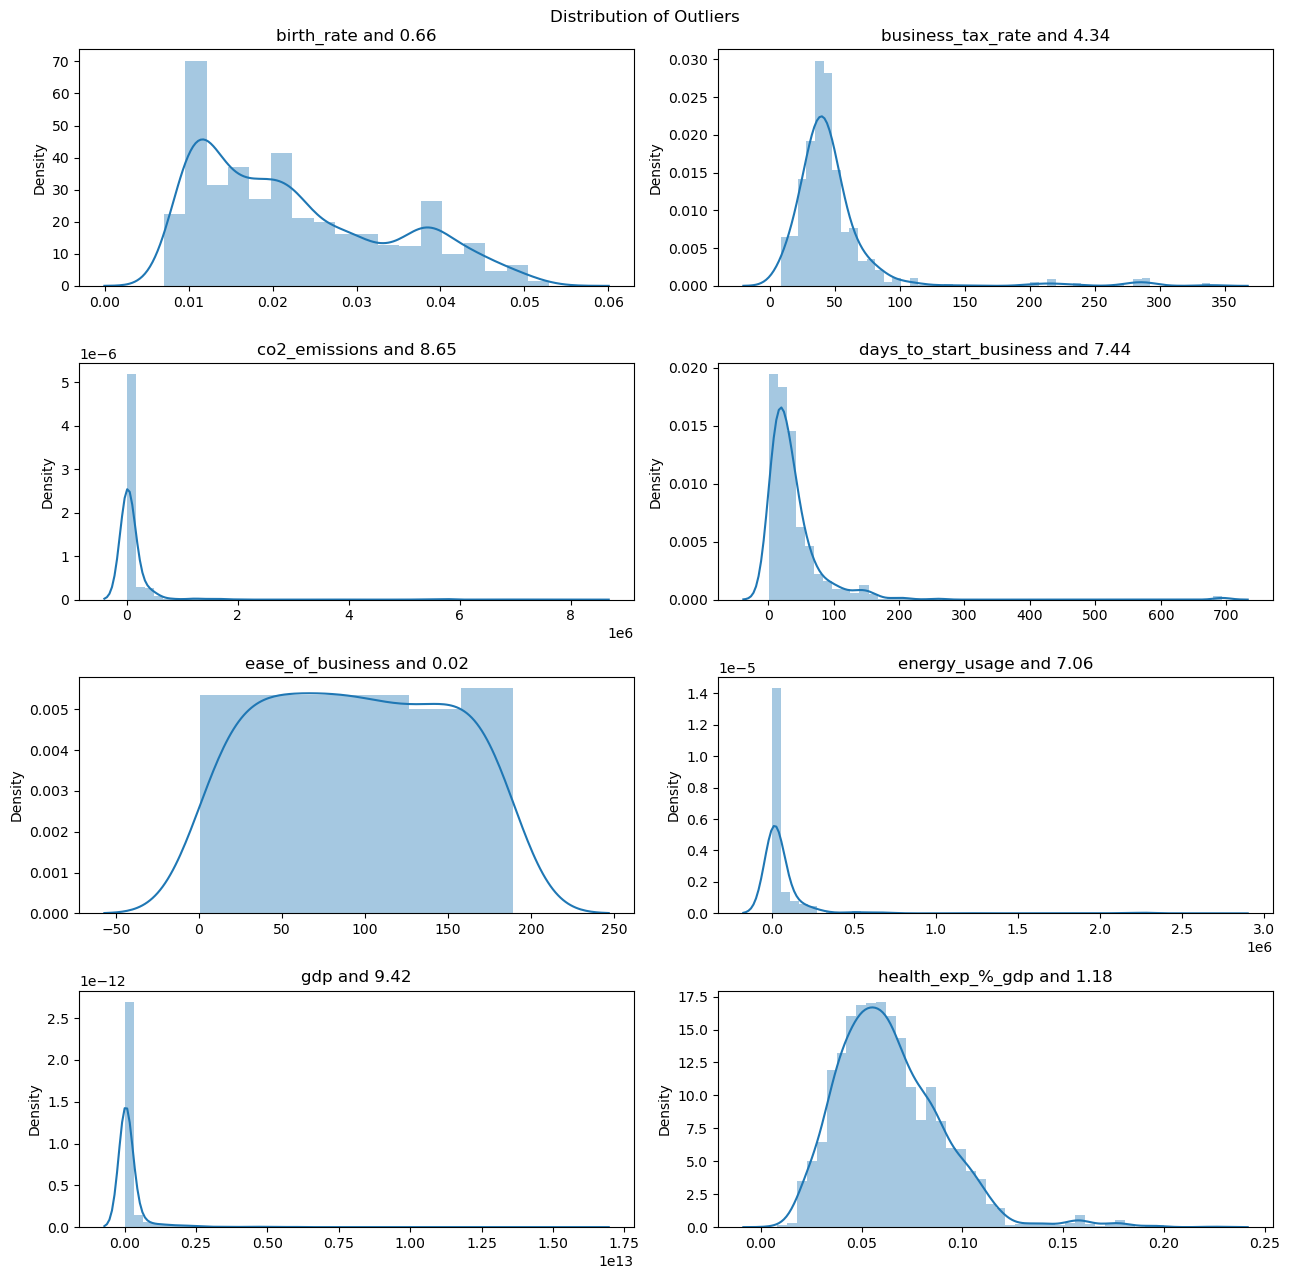

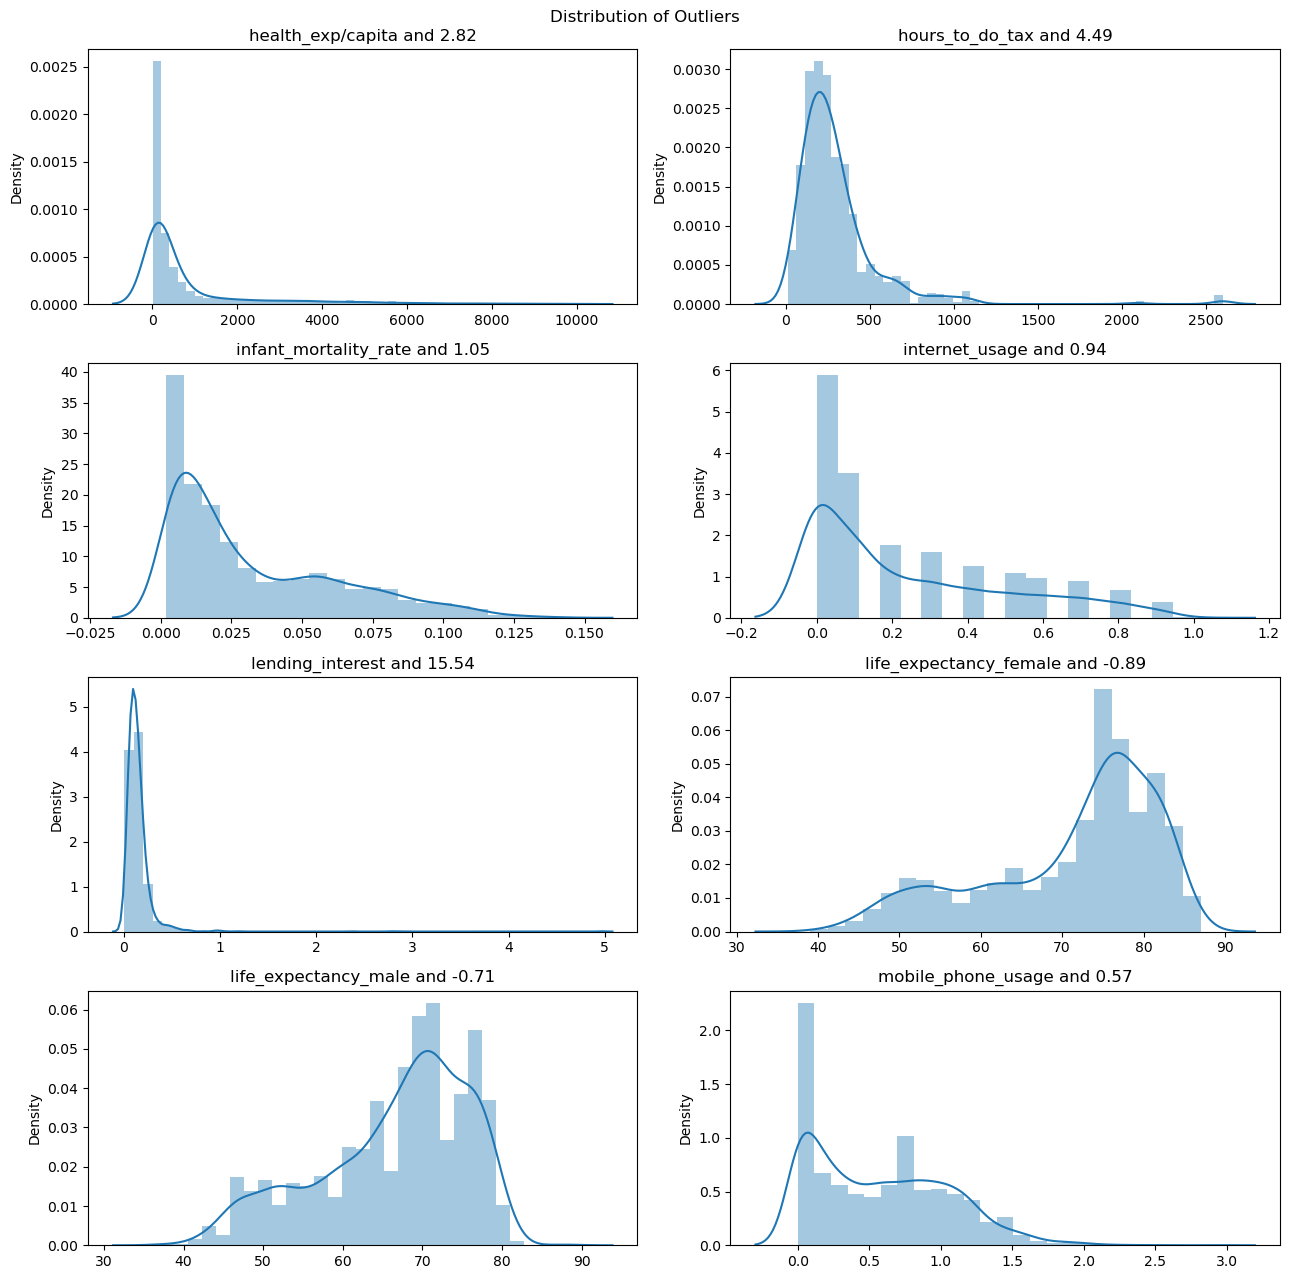

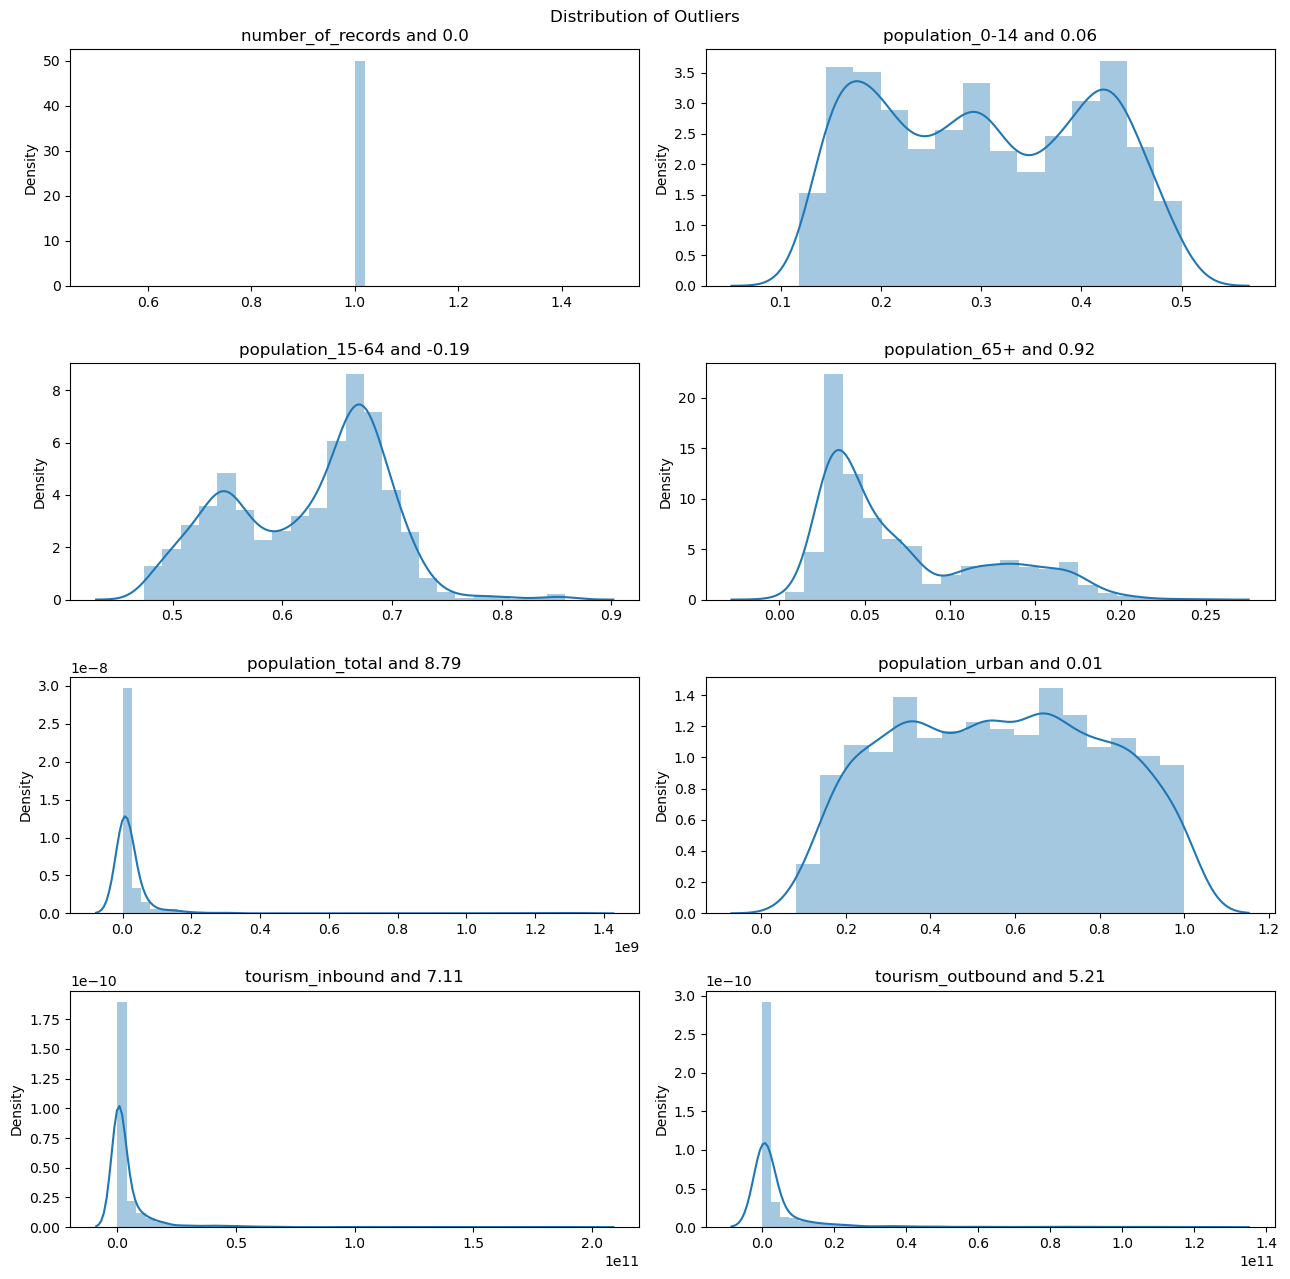

In [144]:
import warnings
warnings.filterwarnings('ignore')
for idx, i in enumerate(num_list):
    if idx % 8 == 0:
        # Create a new figure for every 8 plots
        plt.figure(figsize=(13, 13))
        plt.suptitle("Distribution of Outliers")

    plt.subplot(4, 2, (idx % 8) + 1)
    sns.distplot(x=data[i])
    plt.title(f'{i} and {round(data[i].skew(),2)}')
    plt.tight_layout()

plt.show()

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   birth_rate              2585 non-null   float64
 1   business_tax_rate       1423 non-null   float64
 2   co2_emissions           2125 non-null   float64
 3   country                 2704 non-null   object 
 4   days_to_start_business  1718 non-null   float64
 5   ease_of_business        185 non-null    float64
 6   energy_usage            1785 non-null   float64
 7   gdp                     2494 non-null   float64
 8   health_exp_%_gdp        2395 non-null   float64
 9   health_exp/capita       2395 non-null   float64
 10  hours_to_do_tax         1416 non-null   float64
 11  infant_mortality_rate   2444 non-null   float64
 12  internet_usage          2531 non-null   float64
 13  lending_interest        1880 non-null   float64
 14  life_expectancy_female  2568 non-null   

In [147]:
data.isnull().sum()

birth_rate                 119
business_tax_rate         1281
co2_emissions              579
country                      0
days_to_start_business     986
ease_of_business          2519
energy_usage               919
gdp                        210
health_exp_%_gdp           309
health_exp/capita          309
hours_to_do_tax           1288
infant_mortality_rate      260
internet_usage             173
lending_interest           824
life_expectancy_female     136
life_expectancy_male       136
mobile_phone_usage         167
number_of_records            0
population_0-14            220
population_15-64           220
population_65+             220
population_total             0
population_urban            26
tourism_inbound            368
tourism_outbound           471
dtype: int64

In [148]:
t

,sum_of_null,percentage
ease_of_business,2519,93.158284
hours_to_do_tax,1288,47.633136
business_tax_rate,1281,47.374260
days_to_start_business,986,36.464497
energy_usage,919,33.986686
lending_interest,824,30.473373
co2_emissions,579,21.412722
tourism_outbound,471,17.418639
tourism_inbound,368,13.609467
health_exp_%_gdp,309,11.427515


In [149]:
corr=round(data.select_dtypes(exclude='object').corr(),1)

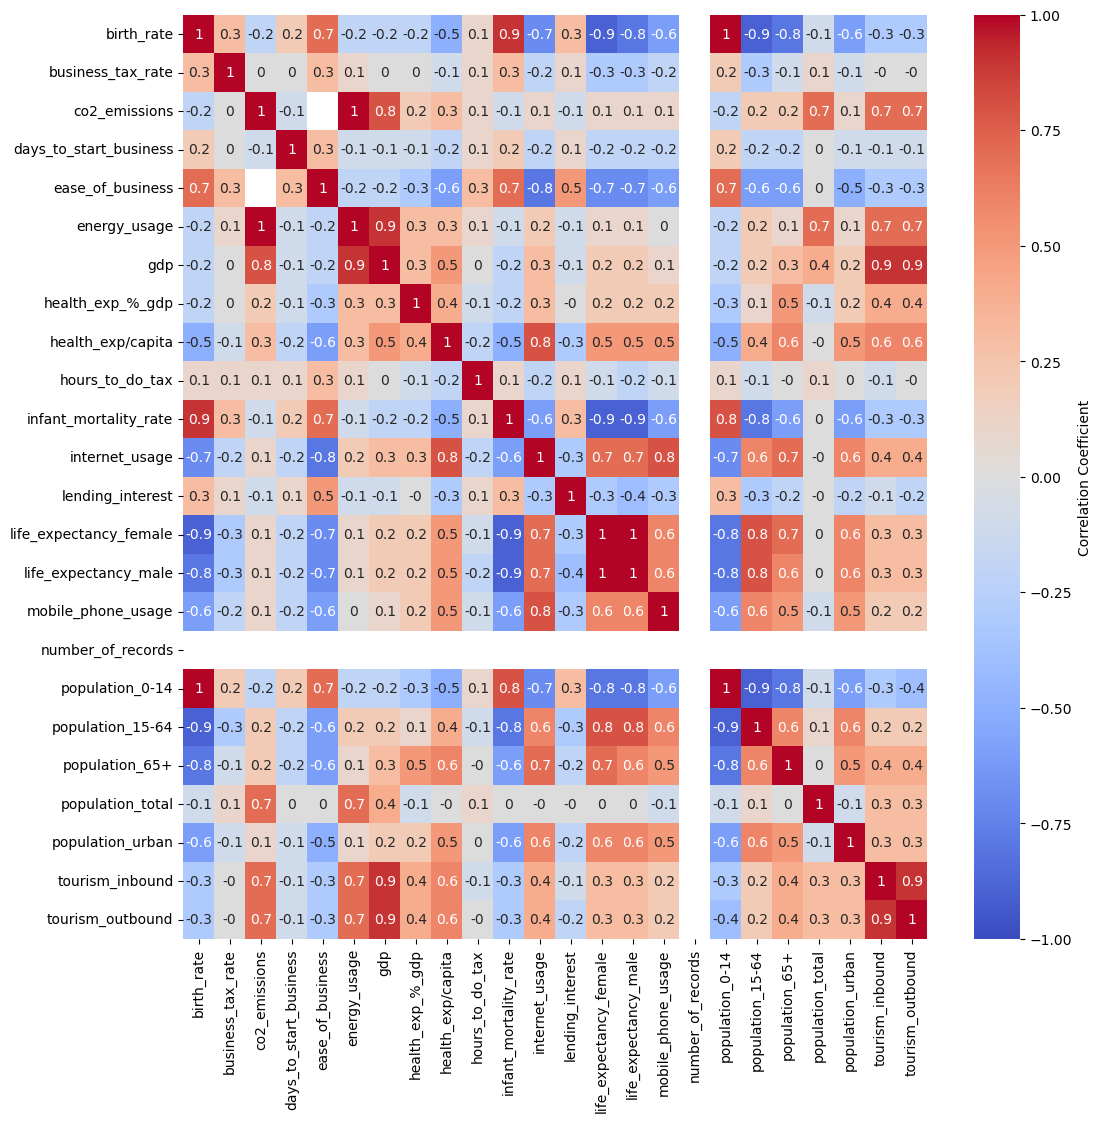

In [163]:
plt.figure(figsize=(12,12))
sns.heatmap(data=corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, 
            cbar_kws={"label": "Correlation Coefficient"})
plt.show()

In [152]:
data.select_dtypes(exclude='object').skew().sort_values()

life_expectancy_female    -0.891556
life_expectancy_male      -0.705485
population_15-64          -0.186881
number_of_records          0.000000
population_urban           0.012519
ease_of_business           0.017745
population_0-14            0.059660
mobile_phone_usage         0.569605
birth_rate                 0.662151
population_65+             0.919841
internet_usage             0.940966
infant_mortality_rate      1.049118
health_exp_%_gdp           1.179757
health_exp/capita          2.817482
business_tax_rate          4.342568
hours_to_do_tax            4.491308
tourism_outbound           5.210304
energy_usage               7.062230
tourism_inbound            7.114871
days_to_start_business     7.437592
co2_emissions              8.654039
population_total           8.788164
gdp                        9.424247
lending_interest          15.536119
dtype: float64

In [153]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame
# List of columns categorized based on their skewness

# Symmetrical or Approximately Symmetrical Features
symmetrical_columns = ['number_of_records', 'population_urban', 'ease_of_business', 'population_0-14', 'population_15-64']

# Moderately Skewed Features
moderately_skewed_columns = ['life_expectancy_female', 'life_expectancy_male', 'mobile_phone_usage', 
                             'birth_rate', 'population_65+', 'internet_usage', 'infant_mortality_rate']

# Highly Skewed Features
highly_skewed_columns = ['health_exp_%_gdp', 'health_exp/capita', 'business_tax_rate', 
                         'hours_to_do_tax', 'tourism_outbound', 'energy_usage', 
                         'tourism_inbound', 'days_to_start_business', 'co2_emissions', 
                         'population_total', 'gdp', 'lending_interest']

# Imputing null values for each group
# 1. Impute mean for symmetrical columns
for col in symmetrical_columns:
  data[col].fillna(data[col].mean(), inplace=True)

# 2. Impute median for moderately skewed columns
for col in moderately_skewed_columns:
    data[col].fillna(data[col].median(), inplace=True)

# 3. Impute median for highly skewed columns
for col in highly_skewed_columns:
    data[col].fillna(data[col].median(), inplace=True)

# Print to confirm that null values have been filled
print("Null values imputed successfully.")


Null values imputed successfully.


In [154]:
data.isnull().sum()

birth_rate                0
business_tax_rate         0
co2_emissions             0
country                   0
days_to_start_business    0
ease_of_business          0
energy_usage              0
gdp                       0
health_exp_%_gdp          0
health_exp/capita         0
hours_to_do_tax           0
infant_mortality_rate     0
internet_usage            0
lending_interest          0
life_expectancy_female    0
life_expectancy_male      0
mobile_phone_usage        0
number_of_records         0
population_0-14           0
population_15-64          0
population_65+            0
population_total          0
population_urban          0
tourism_inbound           0
tourism_outbound          0
dtype: int64

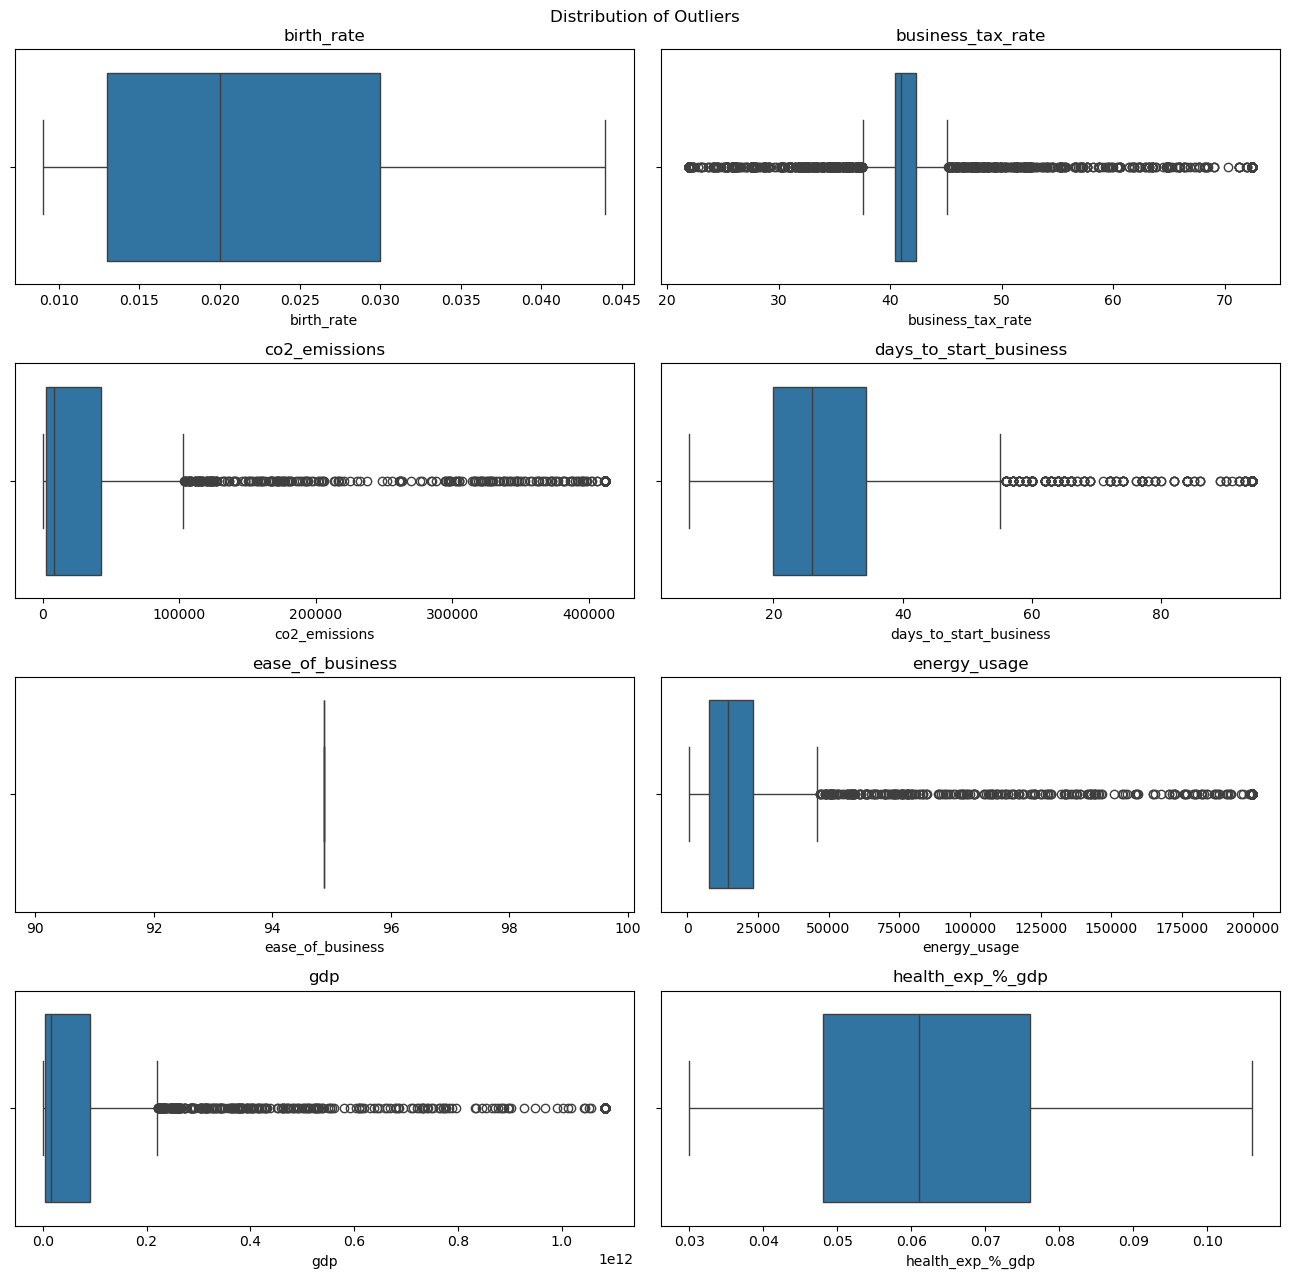

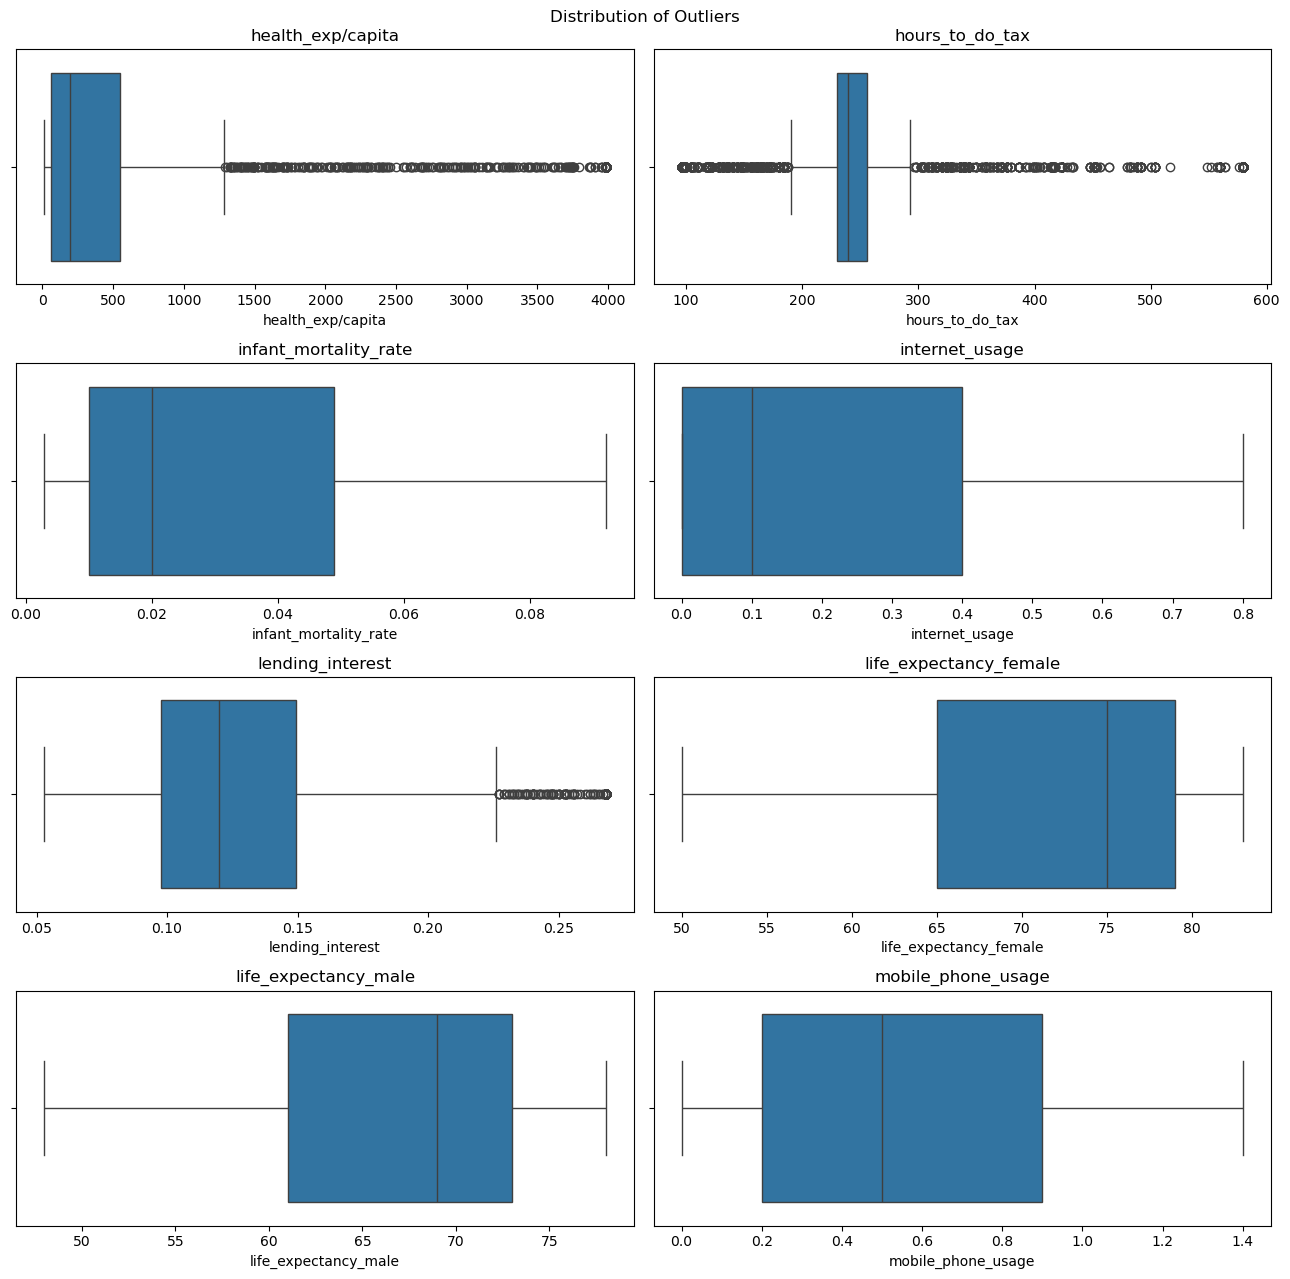

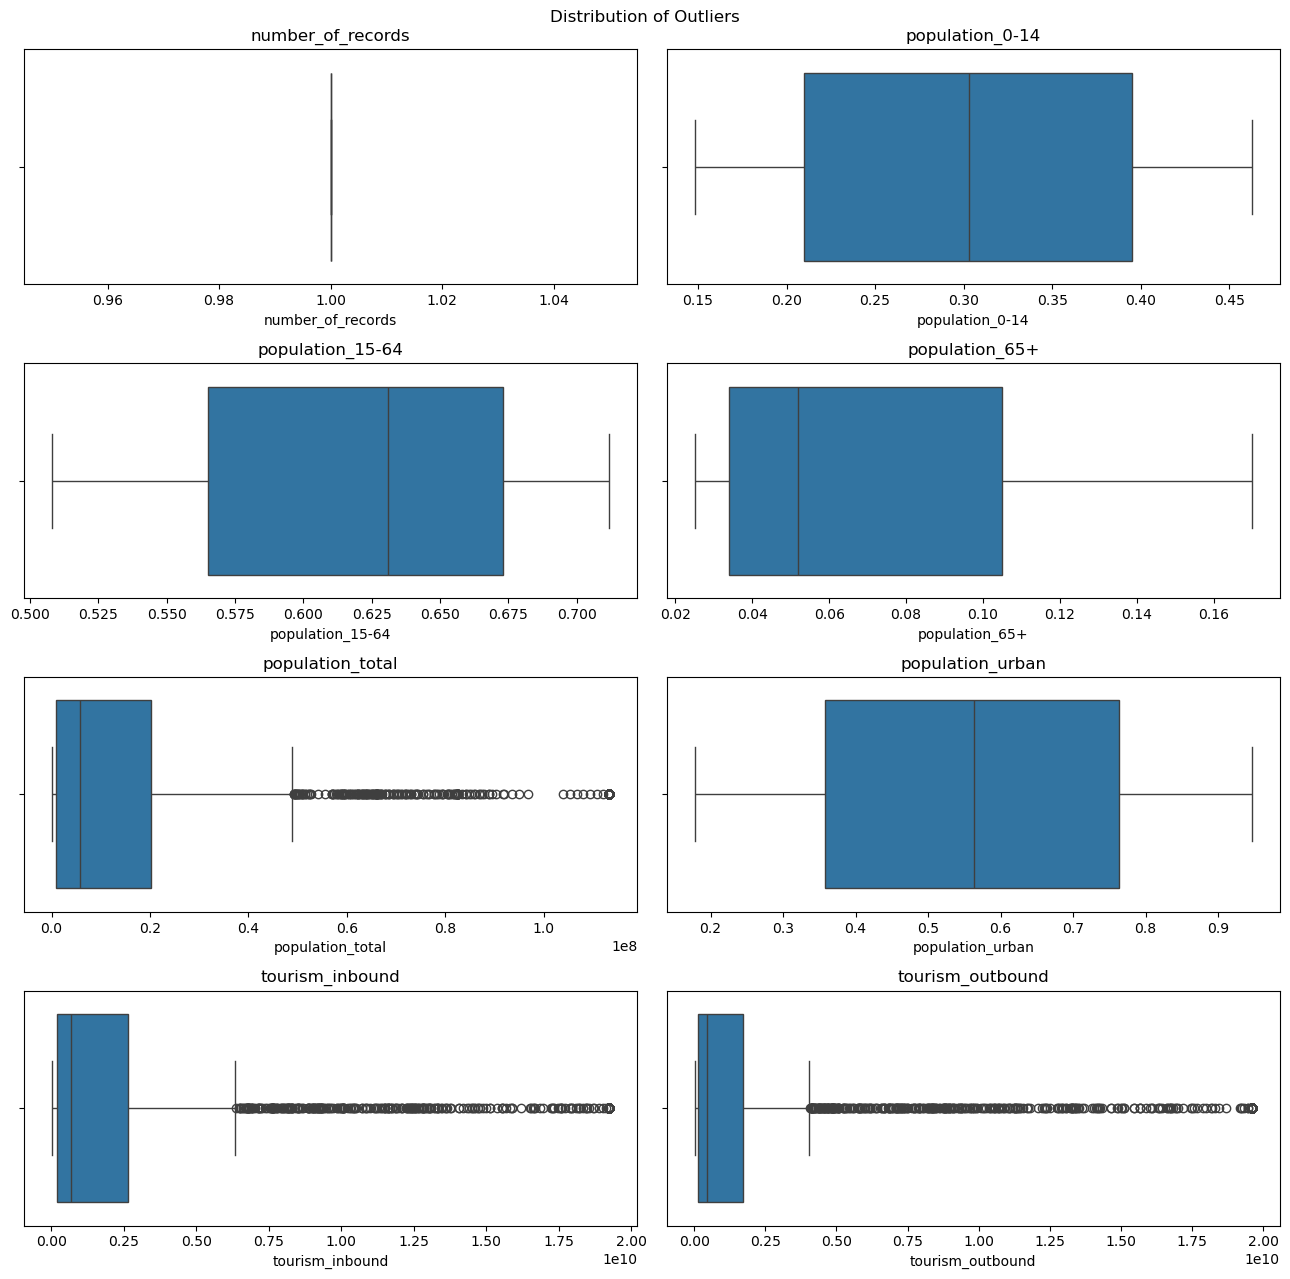

In [165]:
num_list = data.select_dtypes(exclude='object').columns
num_features = len(num_list)

# Create a loop to plot all features
for idx, i in enumerate(num_list):
    if idx % 8 == 0:
        # Create a new figure for every 8 plots
        plt.figure(figsize=(13, 13))
        plt.suptitle("Distribution of Outliers")

    plt.subplot(4, 2, (idx % 8) + 1)
    sns.boxplot(x=data[i])
    plt.title(i)
    plt.tight_layout()

plt.show()

In [156]:


def cap_outliers(df):
    # Select only numeric columns
    num_cols = df.select_dtypes(include='number').columns

    for col in num_cols:
        lower_bound = df[col].quantile(0.05)  # 5th percentile
        upper_bound = df[col].quantile(0.95)  # 95th percentile
        # Cap the values at the 5th and 95th percentiles
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    
    return df



In [157]:
data1=cap_outliers(data)

In [158]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   birth_rate              2704 non-null   float64
 1   business_tax_rate       2704 non-null   float64
 2   co2_emissions           2704 non-null   float64
 3   country                 2704 non-null   object 
 4   days_to_start_business  2704 non-null   float64
 5   ease_of_business        2704 non-null   float64
 6   energy_usage            2704 non-null   float64
 7   gdp                     2704 non-null   float64
 8   health_exp_%_gdp        2704 non-null   float64
 9   health_exp/capita       2704 non-null   float64
 10  hours_to_do_tax         2704 non-null   float64
 11  infant_mortality_rate   2704 non-null   float64
 12  internet_usage          2704 non-null   float64
 13  lending_interest        2704 non-null   float64
 14  life_expectancy_female  2704 non-null   

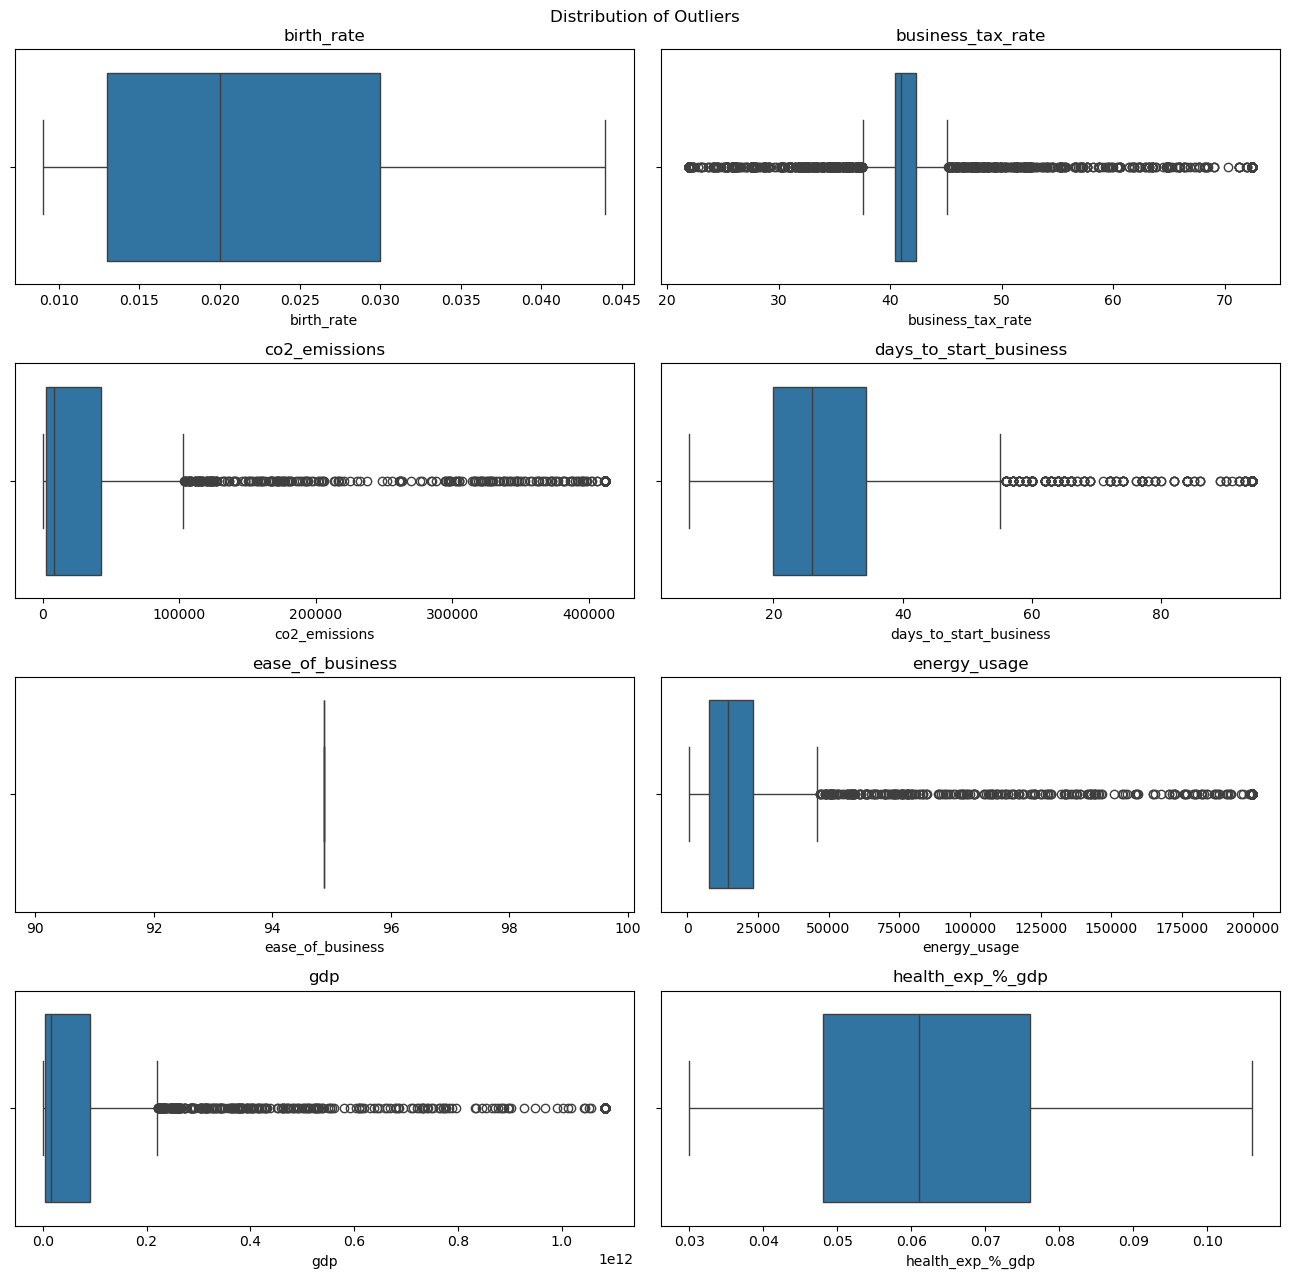

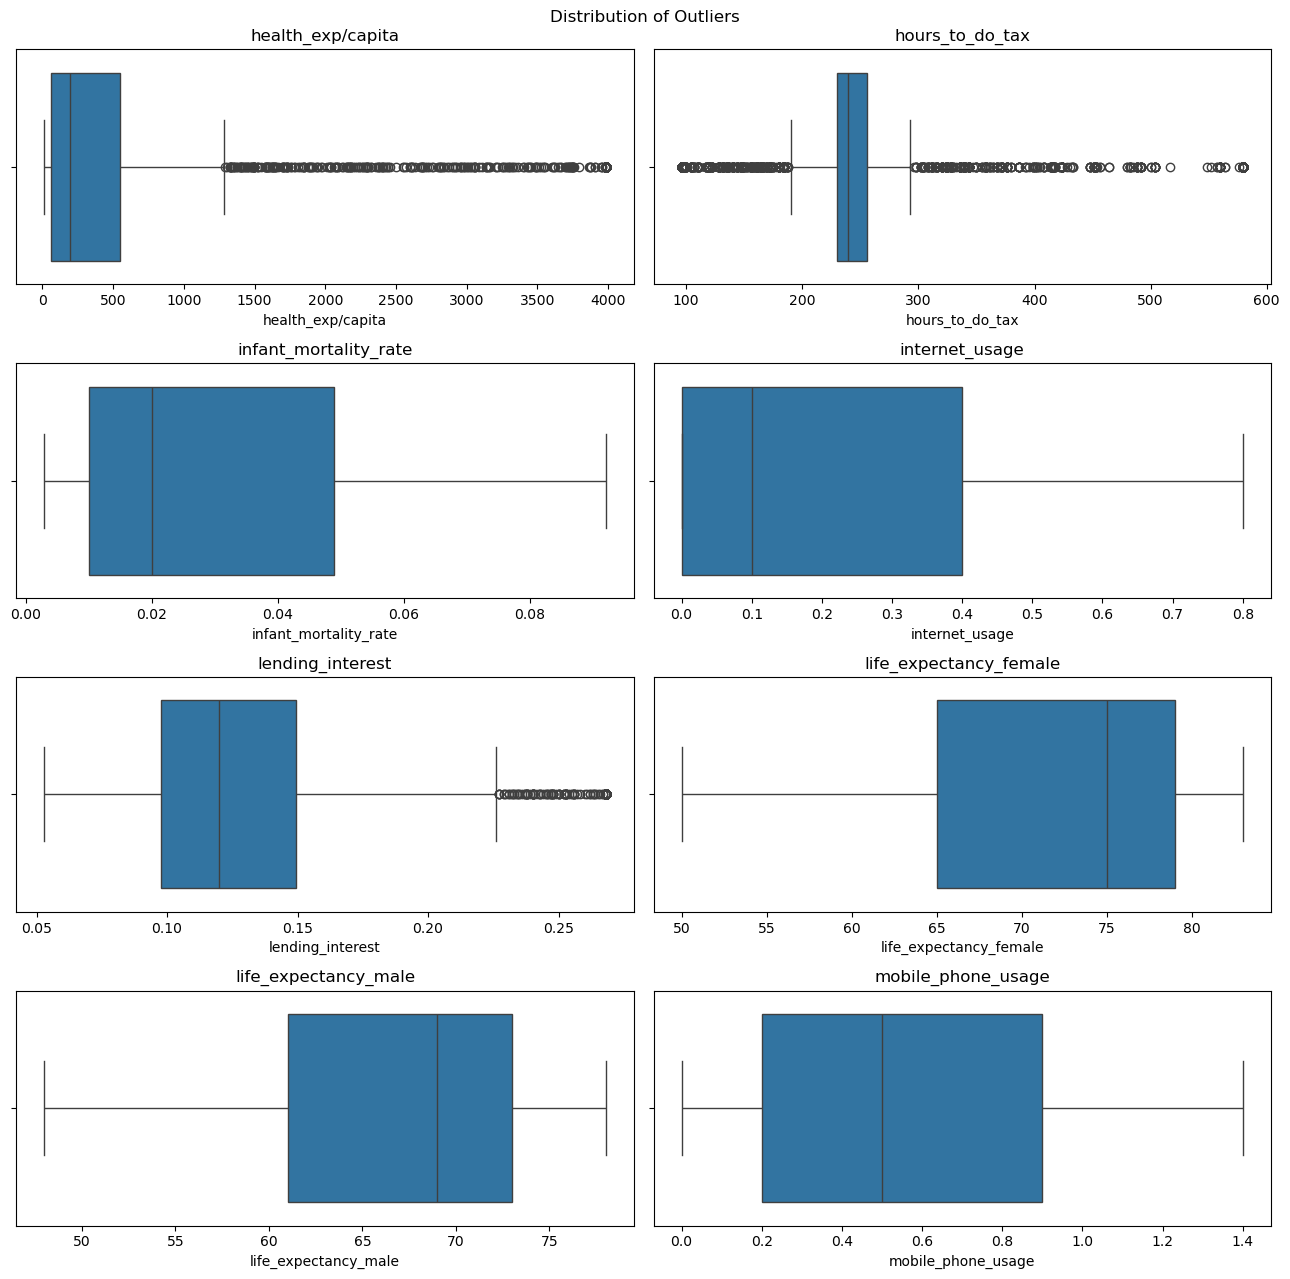

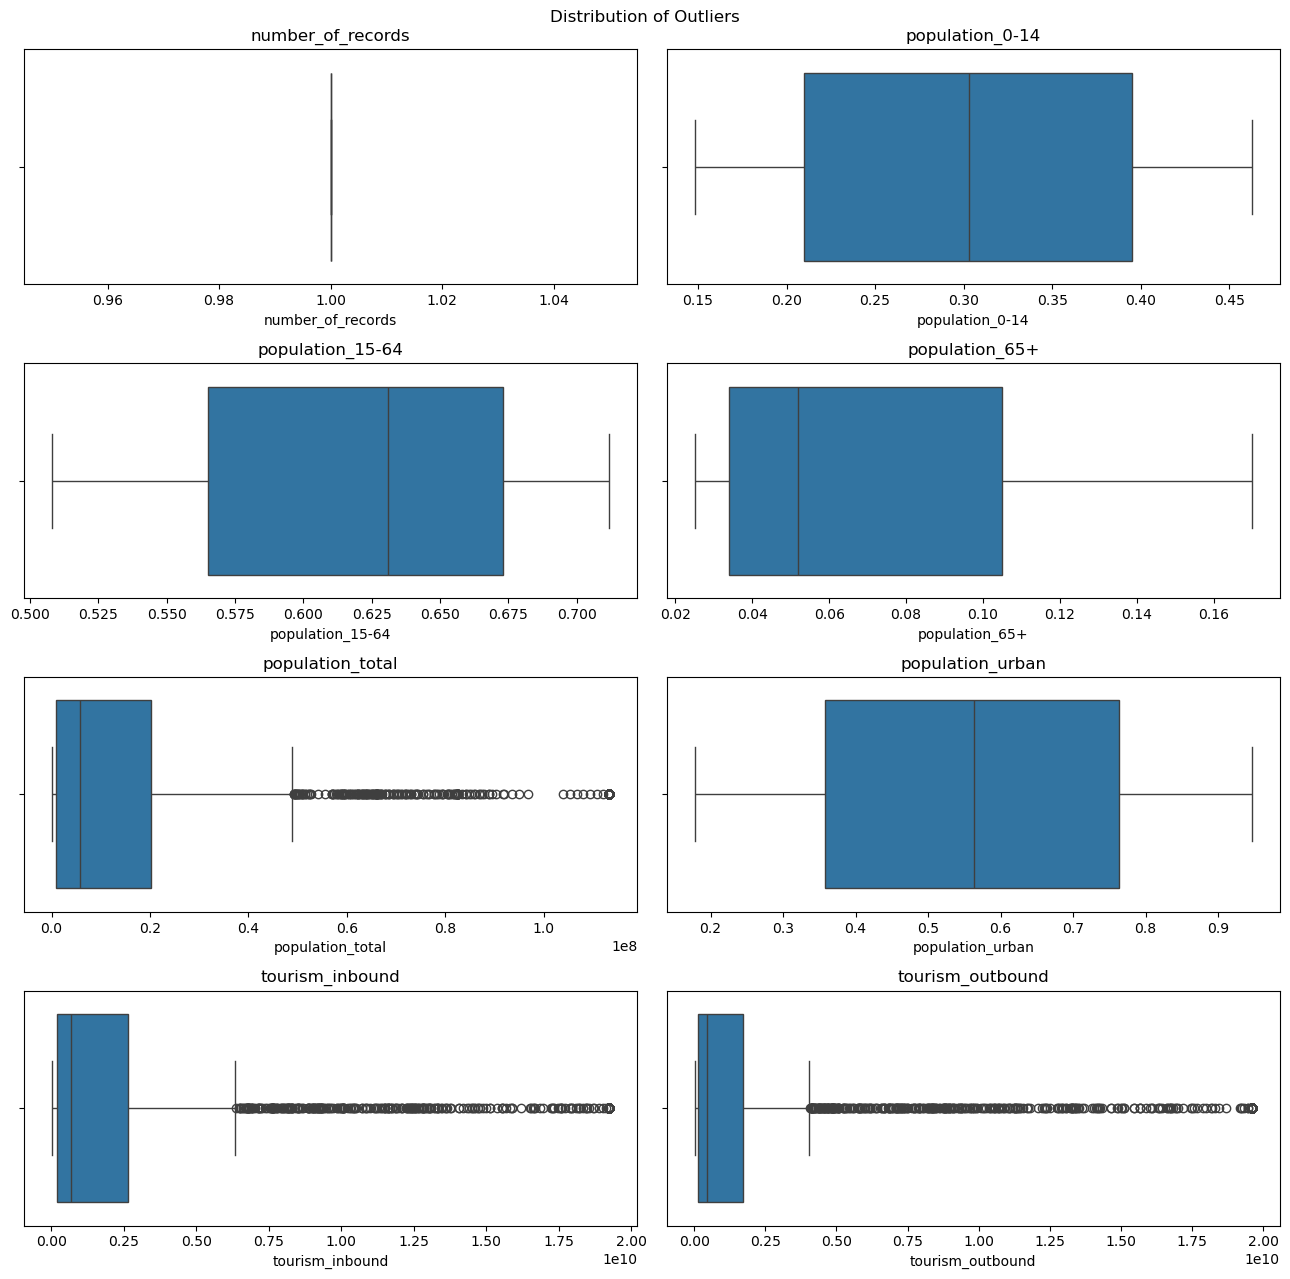

In [159]:
num_list = data.select_dtypes(exclude='object').columns
num_features = len(num_list)

# Create a loop to plot all features
for idx, i in enumerate(num_list):
    if idx % 8 == 0:
        # Create a new figure for every 8 plots
        plt.figure(figsize=(13, 13))
        plt.suptitle("Distribution of Outliers")

    plt.subplot(4, 2, (idx % 8) + 1)
    sns.boxplot(x=data1[i])
    plt.title(i)
    plt.tight_layout()

plt.show()

In [160]:
data1

,birth_rate,business_tax_rate,co2_emissions,country,days_to_start_business,ease_of_business,energy_usage,gdp,health_exp_%_gdp,health_exp/capita,...,life_expectancy_male,mobile_phone_usage,number_of_records,population_0-14,population_15-64,population_65+,population_total,population_urban,tourism_inbound,tourism_outbound
0,0.020,41.0,87931.0,Algeria,26.0,94.875676,26998.0,5.479006e+10,0.035,60.0,...,67.0,0.0,1,0.342000,0.619000,0.039,3.171945e+07,0.59900,1.020000e+08,1.930000e+08
1,0.044,41.0,9542.0,Angola,26.0,94.875676,7499.0,9.129595e+09,0.034,22.0,...,48.0,0.0,1,0.463000,0.508000,0.025,1.392493e+07,0.32400,3.400000e+07,1.460000e+08
2,0.043,41.0,1617.0,Benin,26.0,94.875676,1983.0,2.359122e+09,0.043,15.0,...,53.0,0.0,1,0.454000,0.517000,0.029,6.949366e+06,0.38300,7.700000e+07,5.000000e+07
3,0.027,41.0,4276.0,Botswana,26.0,94.875676,1836.0,5.788312e+09,0.047,152.0,...,49.0,0.1,1,0.383000,0.587000,0.029,1.755375e+06,0.53200,2.270000e+08,2.090000e+08
4,0.044,41.0,1041.0,Burkina Faso,26.0,94.875676,14338.0,2.610959e+09,0.051,15.0,...,49.0,0.0,1,0.463000,0.508000,0.028,1.160794e+07,0.17800,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.020,41.0,8529.0,Turks and Caicos Islands,26.0,94.875676,14338.0,1.507975e+10,0.061,193.0,...,69.0,0.5,1,0.303051,0.623481,0.052,5.638075e+04,0.91100,6.885000e+08,4.560000e+08
2700,0.013,46.4,8529.0,United States,7.0,94.875676,199661.1,1.083905e+12,0.106,3981.4,...,76.0,1.0,1,0.196000,0.667000,0.136,1.133179e+08,0.81100,1.924240e+10,1.961230e+10
2701,0.015,41.9,8529.0,Uruguay,7.0,94.875676,14338.0,5.000435e+10,0.089,1308.0,...,74.0,1.4,1,0.220000,0.639000,0.140,3.395253e+06,0.94685,2.222000e+09,1.028000e+09
2702,0.020,61.9,8529.0,"Venezuela, RB",94.0,94.875676,14338.0,3.812862e+11,0.046,593.0,...,72.0,1.0,1,0.288000,0.652000,0.060,2.995478e+07,0.88900,9.040000e+08,3.202000e+09


In [ ]:
data_group